### **Standardization vs. Normalization (Using a Kaggle Dataset)**

Both **standardization** and **normalization** are feature scaling techniques used in machine learning to ensure that numerical features have consistent ranges, improving model performance.

---

## **1. Standardization (Z-score normalization)**
Standardization transforms data to have **zero mean** and a **standard deviation of 1**. It maintains the shape of the original distribution but shifts and scales it.

### **Formula:**
$$
X' = \frac{X - \mu}{\sigma}
 $$

### **When to use?**
- If your dataset follows a **Gaussian (normal) distribution**.
- If your model assumes normally distributed data (e.g., linear regression, logistic regression, SVM, PCA).

---

## **2. Normalization (Min-Max Scaling)**
Normalization scales data within a fixed **range (0 to 1 or -1 to 1)**, making it easier for certain machine learning models to interpret.

### **Formula:**
$$
X' = \frac{X - X_{\min}}{X_{\max} - X_{\min}}
 $$

### **When to use?**
- When the dataset **does not follow a normal distribution**.
- When using **distance-based models** (e.g., KNN, K-Means, neural networks).

---

### **Final Notes**
- Use **standardization** when your data follows a normal distribution or when using models that assume normally distributed data.
- Use **normalization** when you need to bound your values between 0 and 1, especially for models that rely on distance calculations.

Would you like me to run the code for you? 🚀

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load Titanic dataset from Kaggle
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Selecting numerical columns for scaling
numeric_cols = ['Age', 'Fare']
df_numeric = df[numeric_cols].dropna()  # Drop missing values

In [ ]:
df.head(use)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_numeric.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [ ]:
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df_numeric), columns=numeric_cols)

print(df_standardized.head())

        Age      Fare
0 -0.530377 -0.518978
1  0.571831  0.691897
2 -0.254825 -0.506214
3  0.365167  0.348049
4  0.365167 -0.503850


In [ ]:
df_standardized["Age"].std()

1.0007010165599821

In [ ]:
df_standardized["Age"].mean()

2.338621049070358e-16

In [ ]:
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_numeric), columns=numeric_cols)

print(df_normalized.head())

        Age      Fare
0  0.271174  0.014151
1  0.472229  0.139136
2  0.321438  0.015469
3  0.434531  0.103644
4  0.434531  0.015713


In [ ]:
df_normalized["Age"].max()

1.0

In [ ]:
df_normalized["Age"].min()

0.0

## **Outliers in Data (Using a Kaggle Dataset)**

### **What is an Outlier?**
An **outlier** is an extreme value that differs significantly from the rest of the data. Outliers can affect machine learning models by:
- Skewing model predictions
- Increasing model complexity
- Reducing accuracy

---

## **1. Detecting Outliers**

### **a) Using the IQR Method (Interquartile Range)**
The **IQR method** finds outliers by detecting values that fall outside 1.5 times the interquartile range (IQR).

$$
\text{IQR} = Q3 - Q1
$$
$$
\text{Lower Bound} = Q1 - 1.5 \times \text{IQR}
$$
$$
\text{Upper Bound} = Q3 + 1.5 \times \text{IQR}
$$

### **b) Using Z-Score (Standard Score)**
The **Z-score method** identifies values that are more than **3 standard deviations** away from the mean.

$$
Z = \frac{X - \mu}{\sigma}
$$


## **6. Handling Outliers**
Once detected, outliers can be handled in several ways:

### **a) Removing Outliers**

### **b) Replacing Outliers with Median**

### **c) Log Transformation (for Skewed Data)**

---

## **Key Takeaways**
| Method | Formula | Suitable for |
|--------|---------|-------------|
| **IQR** | Values outside \( Q1 - 1.5 \times IQR \) and \( Q3 + 1.5 \times IQR \) | Skewed datasets |
| **Z-Score** | Values with \( |Z| > 3 \) | Normally distributed data |
| **Boxplot** | Visual method | Quick detection |

Would you like me to run the code and analyze the outliers for you? 🚀

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Load the House Prices dataset from Kaggle
url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
df = pd.read_csv(url)

# Display first few rows
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Detecting Outliers Using the IQR Method

In [ ]:
# Select numerical features for analysis
numeric_cols = ['median_income', 'median_house_value', 'housing_median_age']
df_numeric = df[numeric_cols].dropna()


# Compute IQR
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers_iqr = df_numeric[(df_numeric < lower_bound) | (df_numeric > upper_bound)].dropna()
print("Outliers using IQR:\n", outliers_iqr)


Outliers using IQR:
 Empty DataFrame
Columns: [median_income, median_house_value, housing_median_age]
Index: []


# Detecting Outliers Using the Z-Score Method

In [ ]:
# Compute Z-scores
z_scores = np.abs(zscore(df_numeric))

# Set threshold (Z > 3)
outliers_z = df_numeric[(z_scores > 3).any(axis=1)]
print("Outliers using Z-score:\n", outliers_z)


Outliers using Z-score:
        median_income  median_house_value  housing_median_age
131          11.6017            392600.0                18.0
409          10.0825            397000.0                52.0
510          11.8603            500001.0                39.0
511          13.4990            500001.0                42.0
512          12.2138            500001.0                52.0
...              ...                 ...                 ...
20376        10.2614            410800.0                16.0
20380        10.1597            500001.0                16.0
20389        10.0595            500001.0                26.0
20426        10.0472            500001.0                11.0
20436        12.5420            500001.0                10.0

[345 rows x 3 columns]


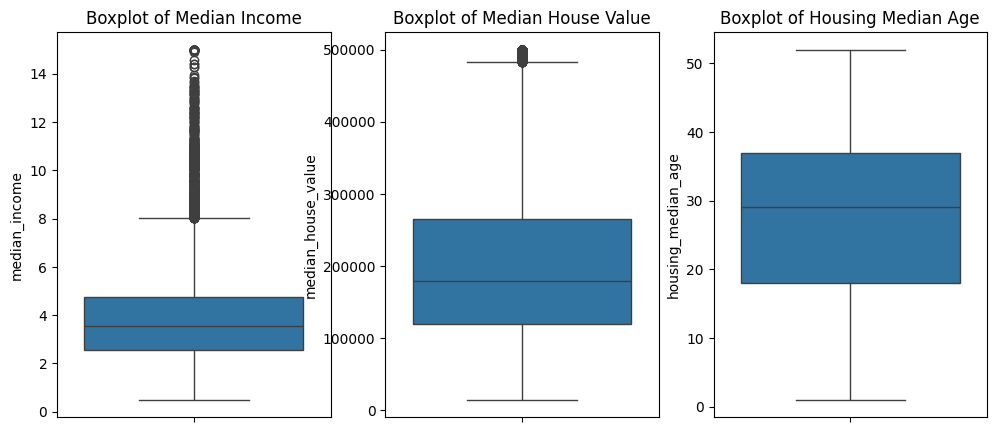

In [ ]:
plt.figure(figsize=(12, 5))

# Boxplot for Median Income
plt.subplot(1, 3, 1)
sns.boxplot(y=df_numeric['median_income'])
plt.title("Boxplot of Median Income")

# Boxplot for Median House Value
plt.subplot(1, 3, 2)
sns.boxplot(y=df_numeric['median_house_value'])
plt.title("Boxplot of Median House Value")

# Boxplot for Housing Median Age
plt.subplot(1, 3, 3)
sns.boxplot(y=df_numeric['housing_median_age'])
plt.title("Boxplot of Housing Median Age")

plt.show()


# Handling Outliers

- Removing Outliers
-Replacing Outliers with the Median
- Applying Log Transformation

In [ ]:
df_cleaned = df_numeric[~((df_numeric < lower_bound) | (df_numeric > upper_bound)).any(axis=1)]
df_cleaned.head()

,median_income,median_house_value,housing_median_age
2,7.2574,352100.0,52.0
3,5.6431,341300.0,52.0
4,3.8462,342200.0,52.0
5,4.0368,269700.0,52.0
6,3.6591,299200.0,52.0


In [ ]:
df_numeric = df_numeric.apply(lambda x: np.where((x < lower_bound[x.name]) | (x > upper_bound[x.name]), x.median(), x))


In [ ]:
df_numeric['median_house_value'] = np.log1p(df_numeric['median_house_value'])  # Apply log transformation


# cataragy to fuater

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

# Load the dataset
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(url)

# Select categorical columns for encoding
df = df[['gender', 'Contract', 'PaymentMethod', 'Churn']]
df.dropna(inplace=True)  # Drop missing values

df.head()


,gender,Contract,PaymentMethod,Churn
0,Female,Month-to-month,Electronic check,No
1,Male,One year,Mailed check,No
2,Male,Month-to-month,Mailed check,Yes
3,Male,One year,Bank transfer (automatic),No
4,Female,Month-to-month,Electronic check,Yes


 # 2. One-Hot Encoding (OHE)

In [ ]:
ohe = OneHotEncoder(drop='first', sparse_output=False)  # Replace 'sparse' with 'sparse_output'
ohe_encoded = pd.DataFrame(ohe.fit_transform(df[['PaymentMethod']]), columns=ohe.get_feature_names_out())

# Concatenate with original DataFrame
df_ohe = pd.concat([df, ohe_encoded], axis=1).drop(columns=['PaymentMethod'])
df_ohe.head()

,gender,Contract,Churn,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Female,Month-to-month,No,0.0,1.0,0.0
1,Male,One year,No,0.0,0.0,1.0
2,Male,Month-to-month,Yes,0.0,0.0,1.0
3,Male,One year,No,0.0,0.0,0.0
4,Female,Month-to-month,Yes,0.0,1.0,0.0


# Label Encoding

In [ ]:
le = LabelEncoder()
df['Gender_Label'] = le.fit_transform(df['gender'])  # Male=1, Female=0
df[['gender', 'Gender_Label']].head()


,gender,Gender_Label
0,Female,0
1,Male,1
2,Male,1
3,Male,1
4,Female,0


# Ordinal Encoding

In [ ]:
ordinal = OrdinalEncoder(categories=[['Month-to-month', 'One year', 'Two year']])  # Define order
df['Contract_Encoded'] = ordinal.fit_transform(df[['Contract']])
df[['Contract', 'Contract_Encoded']].sample(5)


,Contract,Contract_Encoded
4764,Month-to-month,0.0
6523,One year,1.0
1768,One year,1.0
2825,Month-to-month,0.0
1407,Two year,2.0


# Normal Encoding

In [ ]:
freq_encoding = df['PaymentMethod'].value_counts().to_dict()
df['PaymentMethod_Freq'] = df['PaymentMethod'].map(freq_encoding)
df[['PaymentMethod', 'PaymentMethod_Freq']].head()


,PaymentMethod,PaymentMethod_Freq
0,Electronic check,2365
1,Mailed check,1612
2,Mailed check,1612
3,Bank transfer (automatic),1544
4,Electronic check,2365
